<a href="https://colab.research.google.com/github/ritusingla/deep-image-prior/blob/master/Copy_of_flash_no_flash.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Code for **"Flash/No Flash"** figure. 

In [1]:
"""
*Uncomment if running on colab* 
Set Runtime -> Change runtime type -> Under Hardware Accelerator select GPU in Google Colab 
"""
!git clone https://github.com/ritusingla/deep-image-prior
!mv deep-image-prior/* ./

Cloning into 'deep-image-prior'...
remote: Enumerating objects: 200, done.
remote: Counting objects: 100% (200/200), done.
remote: Compressing objects: 100% (158/158), done.
remote: Total 508 (delta 60), reused 149 (delta 41), pack-reused 308
Receiving objects: 100% (508/508), 162.11 MiB | 19.26 MiB/s, done.
Resolving deltas: 100% (223/223), done.
Checking out files: 100% (246/246), done.


# Import libs

In [0]:
from __future__ import print_function
import matplotlib.pyplot as plt
%matplotlib inline

import os
#os.environ['CUDA_VISIBLE_DEVICES'] = '3'

import numpy as np
from models import *

import torch
import torch.optim

from utils.denoising_utils import *
from utils.sr_utils import load_LR_HR_imgs_sr
torch.backends.cudnn.enabled = True
torch.backends.cudnn.benchmark =True
dtype = torch.cuda.FloatTensor

imsize =-1
PLOT = True

# Load image

HR and LR resolutions: (768, 704), (768, 704)
HR and LR resolutions: (768, 704), (768, 704)
HR and LR resolutions: (768, 704), (768, 704)


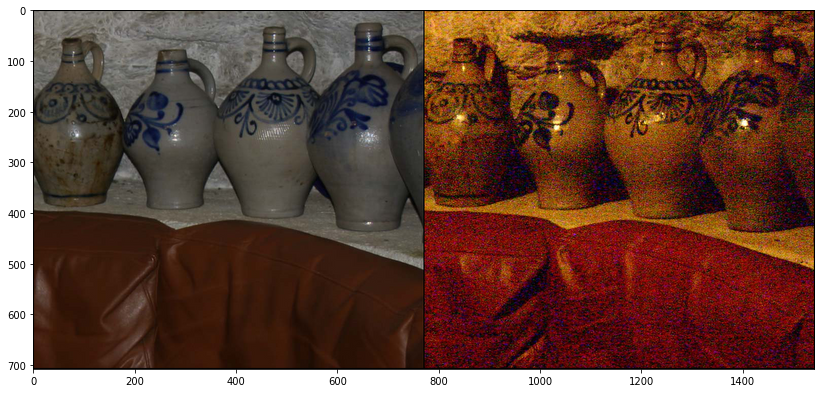

In [8]:
imgs = load_LR_HR_imgs_sr('data/flash_no_flash/cave01_00_flash.jpg', -1, 1, enforse_div32='CROP')
img_flash = load_LR_HR_imgs_sr('data/flash_no_flash/cave01_00_flash.jpg', -1, 1, enforse_div32='CROP')['HR_pil']
img_flash_np = pil_to_np(img_flash)

img_noflash = load_LR_HR_imgs_sr('data/flash_no_flash/cave01_01_noflash.jpg', -1, 1, enforse_div32='CROP')['HR_pil']
img_noflash_np = pil_to_np(img_noflash)

g = plot_image_grid([img_flash_np, img_noflash_np],3,12)

# Setup

In [0]:
pad = 'reflection'
OPT_OVER = 'net'

num_iter = 601
LR = 0.1 
OPTIMIZER = 'adam'
reg_noise_std = 0.0
show_every = 50
figsize = 6

# We will use flash image as input
input_depth = 3
net_input =np_to_torch(img_flash_np).type(dtype)

In [0]:
net = skip(input_depth, 3, num_channels_down = [128, 128, 128, 128, 128], 
                        num_channels_up   = [128, 128, 128, 128, 128],
                        num_channels_skip = [4, 4, 4, 4, 4], 
                        upsample_mode=['nearest', 'nearest', 'bilinear', 'bilinear', 'bilinear'], 
                        need_sigmoid=True, need_bias=True, pad=pad).type(dtype)

mse = torch.nn.MSELoss().type(dtype)

img_flash_var = np_to_torch(img_flash_np).type(dtype)
img_noflash_var = np_to_torch(img_noflash_np).type(dtype)

# Optimize

Starting optimization with ADAM


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2973: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


Iteration 00000    Loss 0.152435

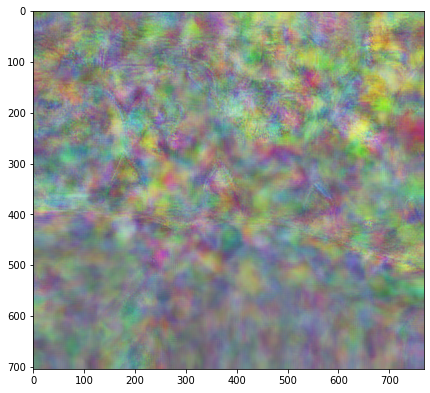

Iteration 00001    Loss 0.058780Iteration 00002    Loss 0.054294Iteration 00003    Loss 0.061755Iteration 00004    Loss 0.059797Iteration 00005    Loss 0.040375Iteration 00006    Loss 0.049204Iteration 00007    Loss 0.043446Iteration 00008    Loss 0.039294Iteration 00009    Loss 0.037918Iteration 00010    Loss 0.030462Iteration 00011    Loss 0.029876Iteration 00012    Loss 0.030270Iteration 00013    Loss 0.026127Iteration 00014    Loss 0.022697Iteration 00015    Loss 0.017832Iteration 00016    Loss 0.026172Iteration 00017    Loss 0.018796Iteration 00018    Loss 0.021740Iteration 00019    Loss 0.018593Iteration 00020    Loss 0.018097Iteration 00021    Loss 0.020383Iteration 00022    Loss 0.017381Iteration 00023    Loss 0.018048Iteration 00024    Loss 0.018556Iteration 00025    Loss 0.016511Iteration 00026    Loss 0.016117Iteration 00027    Loss 0.017304Iteration 00028    Loss 0.015532Iteration 00029    Loss 0.016004Iteration 00030    Loss 0.016172Iteration 00031    Loss 0.015198Iteratio

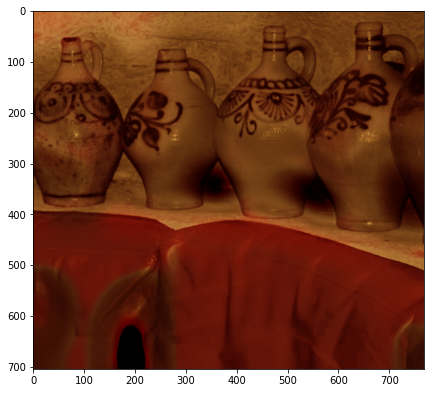

Iteration 00051    Loss 0.012294Iteration 00052    Loss 0.012126Iteration 00053    Loss 0.012000Iteration 00054    Loss 0.012000Iteration 00055    Loss 0.011785Iteration 00056    Loss 0.011696Iteration 00057    Loss 0.011579Iteration 00058    Loss 0.011479Iteration 00059    Loss 0.011380Iteration 00060    Loss 0.011245Iteration 00061    Loss 0.011123Iteration 00062    Loss 0.011051Iteration 00063    Loss 0.011595Iteration 00064    Loss 0.012954Iteration 00065    Loss 0.011253Iteration 00066    Loss 0.011685Iteration 00067    Loss 0.011522Iteration 00068    Loss 0.011249Iteration 00069    Loss 0.011170Iteration 00070    Loss 0.010989Iteration 00071    Loss 0.010676Iteration 00072    Loss 0.010889Iteration 00073    Loss 0.010530Iteration 00074    Loss 0.010648Iteration 00075    Loss 0.010302Iteration 00076    Loss 0.010419Iteration 00077    Loss 0.010208Iteration 00078    Loss 0.010188Iteration 00079    Loss 0.010061Iteration 00080    Loss 0.009939Iteration 00081    Loss 0.010004Iteratio

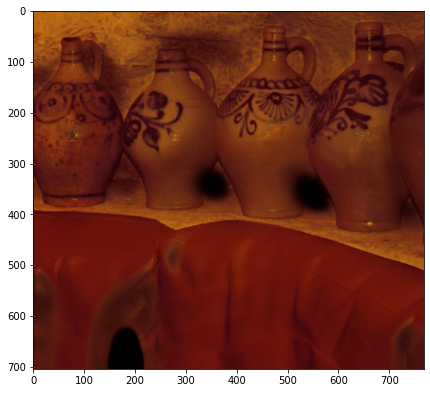

Iteration 00101    Loss 0.011154Iteration 00102    Loss 0.010770Iteration 00103    Loss 0.010480Iteration 00104    Loss 0.010331Iteration 00105    Loss 0.010214Iteration 00106    Loss 0.009833Iteration 00107    Loss 0.009976Iteration 00108    Loss 0.009884Iteration 00109    Loss 0.009689Iteration 00110    Loss 0.009791Iteration 00111    Loss 0.009525Iteration 00112    Loss 0.009522Iteration 00113    Loss 0.009394Iteration 00114    Loss 0.009370Iteration 00115    Loss 0.009235Iteration 00116    Loss 0.009263Iteration 00117    Loss 0.009161Iteration 00118    Loss 0.009099Iteration 00119    Loss 0.009029Iteration 00120    Loss 0.008954Iteration 00121    Loss 0.008935Iteration 00122    Loss 0.008866Iteration 00123    Loss 0.008846Iteration 00124    Loss 0.008808Iteration 00125    Loss 0.008749Iteration 00126    Loss 0.008714Iteration 00127    Loss 0.008664Iteration 00128    Loss 0.008632Iteration 00129    Loss 0.008598Iteration 00130    Loss 0.008558Iteration 00131    Loss 0.008531Iteratio

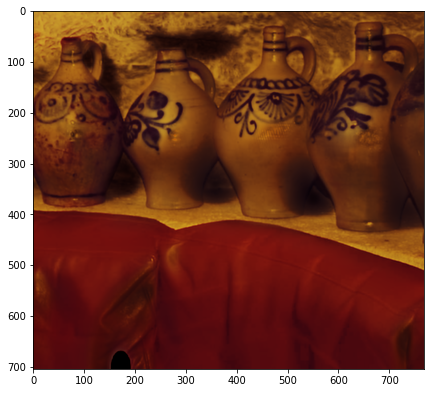

Iteration 00151    Loss 0.008250Iteration 00152    Loss 0.008172Iteration 00153    Loss 0.008244Iteration 00154    Loss 0.008202Iteration 00155    Loss 0.008121Iteration 00156    Loss 0.008205Iteration 00157    Loss 0.008100Iteration 00158    Loss 0.008113Iteration 00159    Loss 0.008041Iteration 00160    Loss 0.008076Iteration 00161    Loss 0.008117Iteration 00162    Loss 0.008166Iteration 00163    Loss 0.008019Iteration 00164    Loss 0.007981Iteration 00165    Loss 0.008094Iteration 00166    Loss 0.008084Iteration 00167    Loss 0.008015Iteration 00168    Loss 0.008040Iteration 00169    Loss 0.008021Iteration 00170    Loss 0.008046Iteration 00171    Loss 0.007894Iteration 00172    Loss 0.007944Iteration 00173    Loss 0.007918Iteration 00174    Loss 0.007870Iteration 00175    Loss 0.007952Iteration 00176    Loss 0.008080Iteration 00177    Loss 0.008198Iteration 00178    Loss 0.008215Iteration 00179    Loss 0.007951Iteration 00180    Loss 0.008068Iteration 00181    Loss 0.007951Iteratio

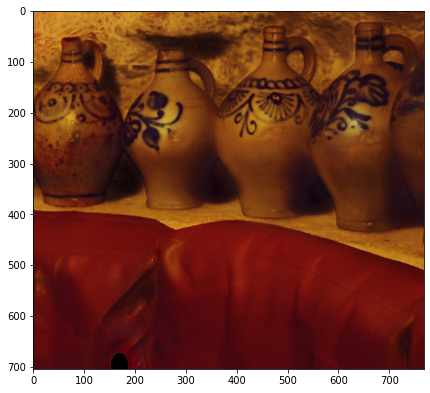

Iteration 00201    Loss 0.007883Iteration 00202    Loss 0.007780Iteration 00203    Loss 0.007707Iteration 00204    Loss 0.007753Iteration 00205    Loss 0.007701Iteration 00206    Loss 0.007757Iteration 00207    Loss 0.007630Iteration 00208    Loss 0.007683Iteration 00209    Loss 0.007677Iteration 00210    Loss 0.007667Iteration 00211    Loss 0.007728Iteration 00212    Loss 0.007748Iteration 00213    Loss 0.007642Iteration 00214    Loss 0.007656Iteration 00215    Loss 0.007756Iteration 00216    Loss 0.007693Iteration 00217    Loss 0.007695Iteration 00218    Loss 0.007810Iteration 00219    Loss 0.007745Iteration 00220    Loss 0.007790Iteration 00221    Loss 0.007906Iteration 00222    Loss 0.007755Iteration 00223    Loss 0.007693Iteration 00224    Loss 0.007629Iteration 00225    Loss 0.007632Iteration 00226    Loss 0.007599Iteration 00227    Loss 0.007570Iteration 00228    Loss 0.007636Iteration 00229    Loss 0.007612Iteration 00230    Loss 0.007797Iteration 00231    Loss 0.007765Iteratio

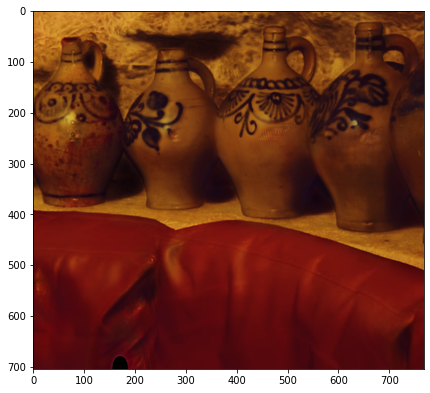

Iteration 00251    Loss 0.007459Iteration 00252    Loss 0.007635Iteration 00253    Loss 0.007782Iteration 00254    Loss 0.007776Iteration 00255    Loss 0.007878Iteration 00256    Loss 0.007956Iteration 00257    Loss 0.007624Iteration 00258    Loss 0.007425Iteration 00259    Loss 0.007396Iteration 00260    Loss 0.007357Iteration 00261    Loss 0.007473Iteration 00262    Loss 0.007477Iteration 00263    Loss 0.007476Iteration 00264    Loss 0.007359Iteration 00265    Loss 0.007315Iteration 00266    Loss 0.007292Iteration 00267    Loss 0.007404Iteration 00268    Loss 0.007354Iteration 00269    Loss 0.007321Iteration 00270    Loss 0.007251Iteration 00271    Loss 0.007262Iteration 00272    Loss 0.007256Iteration 00273    Loss 0.007253Iteration 00274    Loss 0.007313Iteration 00275    Loss 0.007441Iteration 00276    Loss 0.007507Iteration 00277    Loss 0.007382Iteration 00278    Loss 0.007475Iteration 00279    Loss 0.007621Iteration 00280    Loss 0.007691Iteration 00281    Loss 0.007501Iteratio

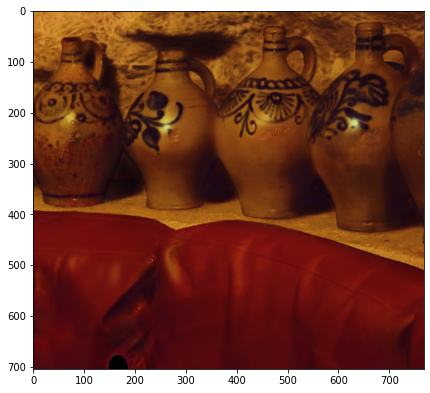

Iteration 00301    Loss 0.007457Iteration 00302    Loss 0.007534Iteration 00303    Loss 0.007402Iteration 00304    Loss 0.007357Iteration 00305    Loss 0.007238Iteration 00306    Loss 0.007265Iteration 00307    Loss 0.007241Iteration 00308    Loss 0.007174Iteration 00309    Loss 0.007197Iteration 00310    Loss 0.007205Iteration 00311    Loss 0.007185Iteration 00312    Loss 0.007160Iteration 00313    Loss 0.007154Iteration 00314    Loss 0.007167Iteration 00315    Loss 0.007197Iteration 00316    Loss 0.007240Iteration 00317    Loss 0.007336Iteration 00318    Loss 0.007460Iteration 00319    Loss 0.007714Iteration 00320    Loss 0.007638Iteration 00321    Loss 0.007593Iteration 00322    Loss 0.007376Iteration 00323    Loss 0.007304Iteration 00324    Loss 0.007189Iteration 00325    Loss 0.007246Iteration 00326    Loss 0.007352Iteration 00327    Loss 0.007381Iteration 00328    Loss 0.007415Iteration 00329    Loss 0.007281Iteration 00330    Loss 0.007134Iteration 00331    Loss 0.007105Iteratio

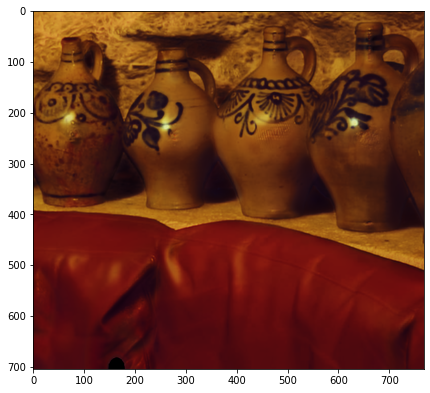

Iteration 00351    Loss 0.007010Iteration 00352    Loss 0.007046Iteration 00353    Loss 0.007122Iteration 00354    Loss 0.007125Iteration 00355    Loss 0.007076Iteration 00356    Loss 0.007081Iteration 00357    Loss 0.007328Iteration 00358    Loss 0.007462Iteration 00359    Loss 0.007597Iteration 00360    Loss 0.007418Iteration 00361    Loss 0.007290Iteration 00362    Loss 0.007418Iteration 00363    Loss 0.007355Iteration 00364    Loss 0.007272Iteration 00365    Loss 0.007210Iteration 00366    Loss 0.007198Iteration 00367    Loss 0.007145Iteration 00368    Loss 0.007157Iteration 00369    Loss 0.007130Iteration 00370    Loss 0.007109Iteration 00371    Loss 0.007072Iteration 00372    Loss 0.007056Iteration 00373    Loss 0.007021Iteration 00374    Loss 0.007011Iteration 00375    Loss 0.006972Iteration 00376    Loss 0.006968Iteration 00377    Loss 0.006961Iteration 00378    Loss 0.006955Iteration 00379    Loss 0.006955Iteration 00380    Loss 0.006952Iteration 00381    Loss 0.006977Iteratio

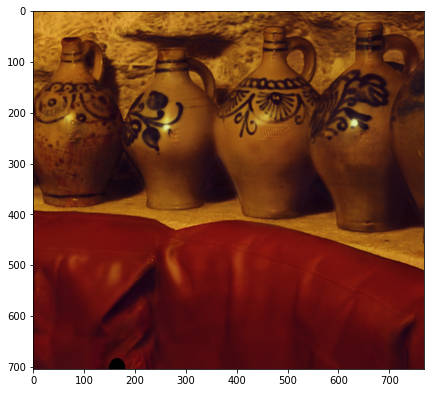

Iteration 00401    Loss 0.006931Iteration 00402    Loss 0.006908Iteration 00403    Loss 0.006899Iteration 00404    Loss 0.006951Iteration 00405    Loss 0.006933Iteration 00406    Loss 0.006924Iteration 00407    Loss 0.006887Iteration 00408    Loss 0.006878Iteration 00409    Loss 0.006903Iteration 00410    Loss 0.006942Iteration 00411    Loss 0.006958Iteration 00412    Loss 0.006955Iteration 00413    Loss 0.007028Iteration 00414    Loss 0.007116Iteration 00415    Loss 0.007134Iteration 00416    Loss 0.007202Iteration 00417    Loss 0.007148Iteration 00418    Loss 0.006994Iteration 00419    Loss 0.006880Iteration 00420    Loss 0.006894Iteration 00421    Loss 0.006863Iteration 00422    Loss 0.006924Iteration 00423    Loss 0.006979Iteration 00424    Loss 0.006882Iteration 00425    Loss 0.006882Iteration 00426    Loss 0.006871Iteration 00427    Loss 0.006803Iteration 00428    Loss 0.006799Iteration 00429    Loss 0.006828Iteration 00430    Loss 0.006833Iteration 00431    Loss 0.006807Iteratio

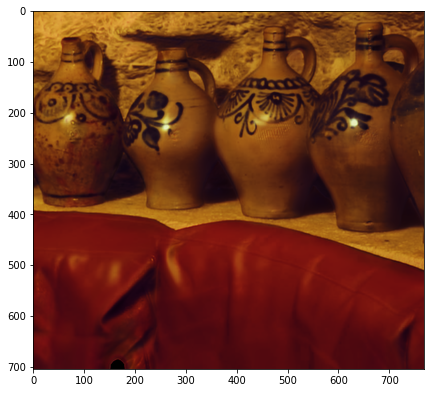

Iteration 00451    Loss 0.007132Iteration 00452    Loss 0.007211Iteration 00453    Loss 0.007360Iteration 00454    Loss 0.007224Iteration 00455    Loss 0.007034Iteration 00456    Loss 0.006898Iteration 00457    Loss 0.006829Iteration 00458    Loss 0.006898Iteration 00459    Loss 0.006911Iteration 00460    Loss 0.006981Iteration 00461    Loss 0.006933Iteration 00462    Loss 0.006895Iteration 00463    Loss 0.006846Iteration 00464    Loss 0.006783Iteration 00465    Loss 0.006873Iteration 00466    Loss 0.006901Iteration 00467    Loss 0.006874Iteration 00468    Loss 0.006803Iteration 00469    Loss 0.006837Iteration 00470    Loss 0.006793Iteration 00471    Loss 0.006742Iteration 00472    Loss 0.006784Iteration 00473    Loss 0.006773Iteration 00474    Loss 0.006796Iteration 00475    Loss 0.006802Iteration 00476    Loss 0.006828Iteration 00477    Loss 0.006815Iteration 00478    Loss 0.006886Iteration 00479    Loss 0.006921Iteration 00480    Loss 0.006819Iteration 00481    Loss 0.006801Iteratio

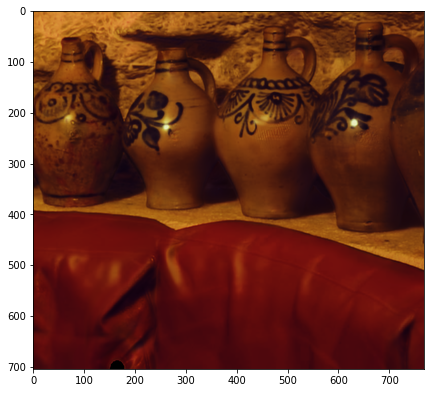

Iteration 00501    Loss 0.006879Iteration 00502    Loss 0.006808Iteration 00503    Loss 0.006845Iteration 00504    Loss 0.006865Iteration 00505    Loss 0.006915Iteration 00506    Loss 0.006934Iteration 00507    Loss 0.006924Iteration 00508    Loss 0.006920Iteration 00509    Loss 0.006903Iteration 00510    Loss 0.006865Iteration 00511    Loss 0.006808Iteration 00512    Loss 0.006848Iteration 00513    Loss 0.006790Iteration 00514    Loss 0.006837Iteration 00515    Loss 0.006785Iteration 00516    Loss 0.006778Iteration 00517    Loss 0.006745Iteration 00518    Loss 0.006754Iteration 00519    Loss 0.006743Iteration 00520    Loss 0.006849Iteration 00521    Loss 0.006879Iteration 00522    Loss 0.006844Iteration 00523    Loss 0.006875Iteration 00524    Loss 0.006845Iteration 00525    Loss 0.006852Iteration 00526    Loss 0.006828Iteration 00527    Loss 0.006857Iteration 00528    Loss 0.006871Iteration 00529    Loss 0.006862Iteration 00530    Loss 0.006819Iteration 00531    Loss 0.006781Iteratio

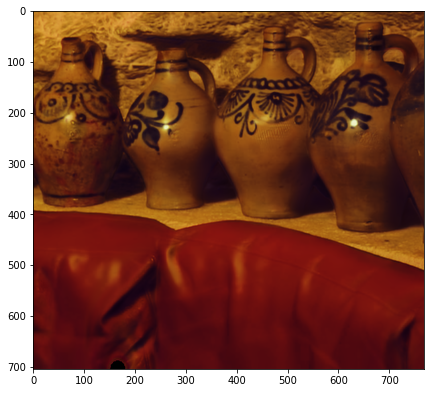

Iteration 00551    Loss 0.006764Iteration 00552    Loss 0.006843Iteration 00553    Loss 0.006958Iteration 00554    Loss 0.006977Iteration 00555    Loss 0.006980Iteration 00556    Loss 0.007000Iteration 00557    Loss 0.007029Iteration 00558    Loss 0.006801Iteration 00559    Loss 0.006781Iteration 00560    Loss 0.006713Iteration 00561    Loss 0.006660Iteration 00562    Loss 0.006732Iteration 00563    Loss 0.006765Iteration 00564    Loss 0.006747Iteration 00565    Loss 0.006750Iteration 00566    Loss 0.006750Iteration 00567    Loss 0.006666Iteration 00568    Loss 0.006666Iteration 00569    Loss 0.006643Iteration 00570    Loss 0.006628Iteration 00571    Loss 0.006623Iteration 00572    Loss 0.006629Iteration 00573    Loss 0.006612Iteration 00574    Loss 0.006649Iteration 00575    Loss 0.006672Iteration 00576    Loss 0.006717Iteration 00577    Loss 0.006759Iteration 00578    Loss 0.006753Iteration 00579    Loss 0.006714Iteration 00580    Loss 0.006668Iteration 00581    Loss 0.006667Iteratio

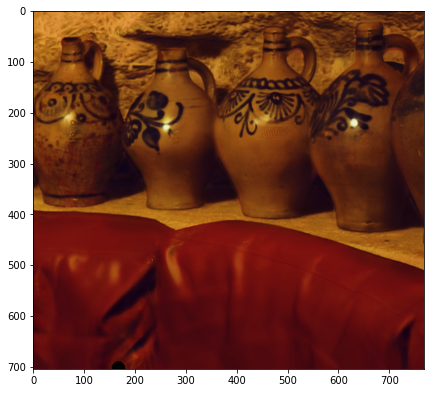

In [11]:
net_input_saved = net_input.detach().clone()
noise = net_input.detach().clone()

l=[]
i = 0
def closure():
    
    global i, net_input,l
    
    if reg_noise_std > 0:
        net_input = net_input_saved + (noise.normal_() * reg_noise_std)
    
    out = net(net_input)
   
    total_loss = mse(out, img_noflash_var)
    l=np.append(l,total_loss.item())
    
    total_loss.backward()
        
    print ('Iteration %05d    Loss %f' % (i, total_loss.item()), sep='\r', end='')
    if  PLOT and i % show_every == 0:
        out_np = torch_to_np(out)
        plot_image_grid([np.clip(out_np, 0, 1)], factor=figsize, nrow=1)
        
    i += 1

    return total_loss

p = get_params(OPT_OVER, net, net_input)
optimize(OPTIMIZER, p, closure, LR, num_iter)

Sometimes the process stucks at reddish image, just run the code from the top one more time. 

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2973: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


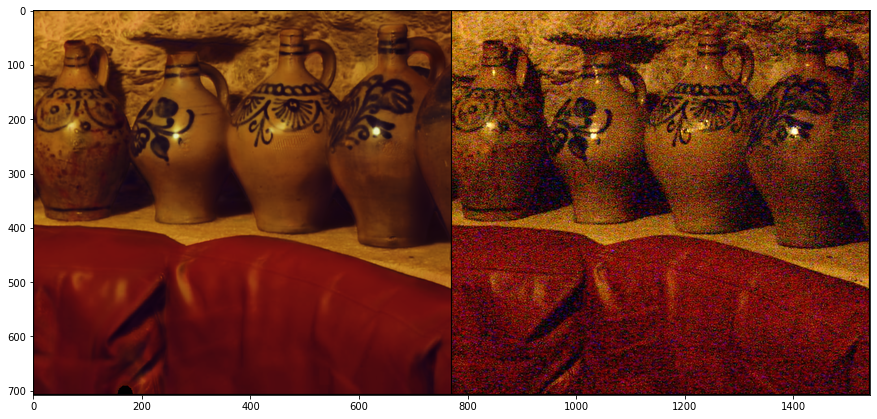

In [12]:
out_np = torch_to_np(net(net_input))
q = plot_image_grid([np.clip(out_np, 0, 1), img_noflash_np], factor=13);

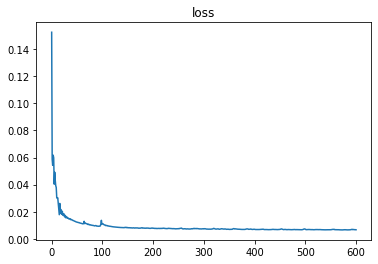

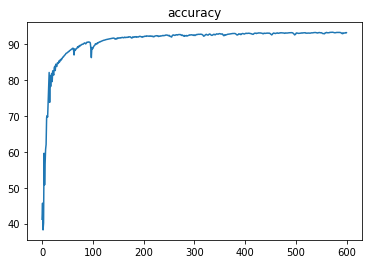

In [15]:
plt.title('loss')
plt.plot(l)
acc=[]
acc= 100-(l*1000)
acc=acc[1:]
#plt.legend()
plt.show()
plt.title('accuracy')
plt.plot(acc)
#plt.legend()
plt.show()

In [16]:
!apt install caffe-cuda
import numpy as np
import matplotlib.pyplot as plt
import caffe
import os
import skimage.color as color
import scipy.ndimage.interpolation as sni

%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 6)

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  caffe-tools-cuda cython3 fonts-lyx javascript-common libblosc1
  libcaffe-cuda1 libcublas9.1 libcudart9.1 libcurand9.1 libgflags2.2
  libgoogle-glog0v5 libjs-jquery libjs-jquery-ui libleveldb1v5 liblmdb0
  python-matplotlib-data python-tables-data python3-bs4 python3-caffe-cuda
  python3-chardet python3-cycler python3-dateutil python3-decorator
  python3-gflags python3-h5py python3-html5lib python3-ipython
  python3-ipython-genutils python3-leveldb python3-lxml python3-matplotlib
  python3-networkx python3-nose python3-numexpr python3-olefile python3-pandas
  python3-pandas-lib python3-pexpect python3-pickleshare python3-pil
  python3-pkg-resources python3-prompt-toolkit python3-protobuf
  python3-ptyprocess python3-pygments python3-pyparsing python3-pywt
  python3-scipy python3-simplegeneric python3-six python3-skimage
  python3-skimage

In [17]:
!wget -O models/colorization_release_v1.caffemodel http://eecs.berkeley.edu/~rich.zhang/projects/2016_colorization/files/demo_v1/colorization_release_v1.caffemodel

--2020-05-26 08:41:36--  http://eecs.berkeley.edu/~rich.zhang/projects/2016_colorization/files/demo_v1/colorization_release_v1.caffemodel
Resolving eecs.berkeley.edu (eecs.berkeley.edu)... 23.185.0.1, 2620:12a:8001::1
Connecting to eecs.berkeley.edu (eecs.berkeley.edu)|23.185.0.1|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://people.eecs.berkeley.edu/~rich.zhang/projects/2016_colorization/files/demo_v1/colorization_release_v1.caffemodel [following]
--2020-05-26 08:41:36--  https://people.eecs.berkeley.edu/~rich.zhang/projects/2016_colorization/files/demo_v1/colorization_release_v1.caffemodel
Resolving people.eecs.berkeley.edu (people.eecs.berkeley.edu)... 128.32.189.73
Connecting to people.eecs.berkeley.edu (people.eecs.berkeley.edu)|128.32.189.73|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 128948189 (123M)
Saving to: ‘models/colorization_release_v1.caffemodel’

models/colorization 100%[===================

In [0]:
gpu_id = 0
caffe.set_mode_gpu()
caffe.set_device(gpu_id)
net = caffe.Net('models/colorization_deploy_v1.prototxt', 'models/colorization_release_v1.caffemodel', caffe.TEST)

(H_in,W_in) = net.blobs['data_l'].data.shape[2:] # get input shape
(H_out,W_out) = net.blobs['class8_ab'].data.shape[2:] # get output shape
net.blobs['Trecip'].data[...] = 6/np.log(10) # 1/T, set annealing temperature
    # (We found that we had introduced a factor of log(10). We will update the arXiv shortly.)

In [23]:
# load the original image
import cv2
# cv2.imwrite('demo/imgs/x.jpg',out_np)
# img_rgb = cv2.imread('demo/imgs/x.jpg')
# img_rgb=img_rgb/255
img_rgb= np.clip(out_np, 0, 1)
img_lab = color.rgb2lab(img_rgb) # convert image to lab color space
img_l = img_lab[:,:,0] # pull out L channel
(H_orig,W_orig) = img_rgb.shape[:2] # original image size

# create grayscale version of image (just for displaying)
img_lab_bw = img_lab.copy()
img_lab_bw[:,:,1:] = 0
img_rgb_bw = color.lab2rgb(img_lab_bw)

# resize image to network input size
img_rs = caffe.io.resize_image(img_rgb,(H_in,W_in)) # resize image to network input size
img_lab_rs = color.rgb2lab(img_rs)
img_l_rs = img_lab_rs[:,:,0]

# show original image, along with grayscale input
# img_pad = np.ones((H_orig,W_orig/10,3))
plt.imshow(np.hstack((img_rgb,  img_rgb_bw)))
plt.axis('off');

ValueError: ignored